In [1]:
import numpy as np
import matplotlib as mpl
%matplotlib inline

import pandas as pd

import json
import glob
import os

from networkit import *

In [2]:
def plot_and_save(df, name, kind='line', xlabel=None, ylabel=None, **kwargs):
    ax = df.plot(kind=kind, **kwargs)
    
    if xlabel != None:
        ax.set_xlabel(xlabel)
    if ylabel != None:
        ax.set_ylabel(ylabel)
    
    ax.legend().set_visible(False)
    mpl.pyplot.savefig("../../dist-thrill-cluster/plots/" + name + "_no_legend.png", dpi=300)
    ax.legend().set_visible(True)
    mpl.pyplot.savefig("../../dist-thrill-cluster/plots/" + name + ".png", dpi=300)
    
    df.to_csv("../../dist-thrill-cluster/plots/" + name + ".csv")

In [3]:
data = {}

for path in glob.glob(os.path.expanduser("/amd.home/home/i11/zeitz/ma/data/results/paper/lfr_params/*.json")):
  for typename, items in json.load(open(path)).items():
    if typename in data:
      data[typename].update(items)
    else:
      data[typename] = items

frames = { typename: pd.DataFrame.from_dict(items, orient='index') for typename, items in data.items() }

In [4]:
dlslm_label = 'DSLM-Mod'
dlslm_me_label = 'DSLM-Map'
seq_postfix = ' w. Seq.'
no_contraction_postfix = ' w/o Contraction'
dlslm_ws_label = dlslm_label + seq_postfix
dlslm_nc_label = dlslm_label + no_contraction_postfix
seq_louvain_label = 'Seq. Louvain'
seq_infomap_label = 'Seq. Infomap'

algo_name_mapping = {
    'synchronous local moving with map equation': dlslm_me_label,
    'synchronous local moving with modularity': dlslm_label,
    'sequential louvain': seq_louvain_label,
    'sequential infomap': seq_infomap_label
}

frames['algorithm_run'].replace({ 'algorithm': algo_name_mapping }, inplace=True)

frames['algorithm_run']['algorithm'] += frames['algorithm_run'].merge(frames['program_run'], left_on='program_run_id', right_index=True, how='left')['switch_to_seq'].map({ False: '', True: seq_postfix, np.NaN: '' })
frames['algorithm_run']['algorithm'] += frames['algorithm_run'].merge(frames['program_run'], left_on='program_run_id', right_index=True, how='left')['contraction'].map({ False: no_contraction_postfix, True: '', np.NaN: '' })
frames['program_run']['mu'] = pd.to_numeric(frames['program_run']['graph'].str[-7:-6]) / 10.0

In [5]:
def siml(x):
    ground_truth = community.readCommunities("/amd.home/home/i11/zeitz/ma/" + x['graph'][:-5] + 'part')
    
    if 'seq_louvain' in x['binary']:
        clustering = community.readCommunities('/amd.home/home/i11/zeitz/ma/' + x['path'])
    elif 'infomap' in x['binary']:
        clustering = community.readCommunities('/amd.home/home/i11/zeitz/ma/' + x['path'])
    else: 
        files = sorted(glob.glob(os.path.expanduser('/amd.home/home/i11/zeitz/ma/' + x['path'].replace('@@@@-#####', '*'))))
        clustering = community.BinaryEdgeListPartitionReader(0, 4).read(files)

    g = graph.Graph(ground_truth.numberOfElements())
    nmi = 1.0 - community.NMIDistance().getDissimilarity(g, clustering, ground_truth)
    ari = 1.0 - community.AdjustedRandMeasure().getDissimilarity(g, clustering, ground_truth)
    return pd.Series([nmi, ari, clustering.numberOfSubsets()])
    
frames['clustering'][['NMI', 'ARI', 'cluster_count']] = frames['clustering'] \
    .merge(frames['algorithm_run'], left_on='algorithm_run_id', right_index=True) \
    .merge(frames['program_run'], left_on='program_run_id', right_index=True) \
    .apply(siml, axis=1)

read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.4.part
read communities from: /amd.home/home/i11/zeitz/ma/data/results/paper/lfr_params/seq_louvain/graph_g2_b1_m0.4.run0.part
read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.4.part
read communities from: /amd.home/home/i11/zeitz/ma/data/results/paper/lfr_params/seq_louvain/graph_g2_b1_m0.4.run0.part
read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.7.part
read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.4.part
read communities from: /amd.home/home/i11/zeitz/ma/data/results/paper/lfr_params/infomap/graph_g2_b1_m0.4.run2.part
read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.6.part
read communities from: /amd.home/home/i11/zeitz/ma/data/results/paper/lfr_params/infomap/graph_g2_b1_m0.6.run1.part
read communities f

read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.4.part
read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.5.part
read communities from: /amd.home/home/i11/zeitz/ma/data/results/paper/lfr_params/seq_louvain/graph_g2_b1_m0.5.run0.part
read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.3.part
read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.2.part
read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.7.part
read communities from: /amd.home/home/i11/zeitz/ma/data/results/paper/lfr_params/seq_louvain/graph_g2_b1_m0.7.run0.part
read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.1.part
read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.9.part
read communities from: /amd.home/home/i11/zeit

read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.4.part
read communities from: /amd.home/home/i11/zeitz/ma/data/results/paper/lfr_params/seq_louvain/graph_g2_b1_m0.4.run1.part
read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.4.part
read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.3.part
read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.6.part
read communities from: /amd.home/home/i11/zeitz/ma/data/results/paper/lfr_params/infomap/graph_g2_b1_m0.6.run0.part
read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.1.part
read communities from: /amd.home/home/i11/zeitz/ma/data/graphs/lfr_params_paper/graph_g2_b1_m0.5.part
read communities from: /amd.home/home/i11/zeitz/ma/data/results/paper/lfr_params/seq_louvain/graph_g2_b1_m0.5.run1.part
read communities from: /amd.home

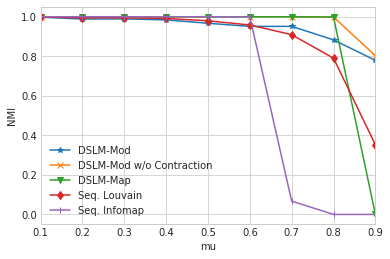

In [6]:
df = frames['clustering'] \
    .merge(frames['algorithm_run'], left_on='algorithm_run_id', right_index=True) \
    .merge(frames['program_run'], left_on='program_run_id', right_index=True) \
    .groupby(['mu', 'algorithm'])['NMI'].max().to_frame() \
    .unstack()['NMI'][[dlslm_label, dlslm_nc_label, dlslm_me_label, seq_louvain_label, seq_infomap_label]]

plot_and_save(df, "quality_NMI", ylabel="NMI", style=['-*', '-x', '-v', '-d', '-|'])

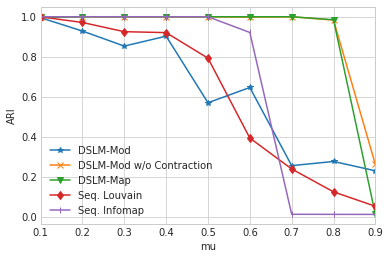

In [7]:
df = frames['clustering'] \
    .merge(frames['algorithm_run'], left_on='algorithm_run_id', right_index=True) \
    .merge(frames['program_run'], left_on='program_run_id', right_index=True) \
    .groupby(['mu', 'algorithm'])['ARI'].min().to_frame() \
    .unstack()['ARI'][[dlslm_label, dlslm_nc_label, dlslm_me_label, seq_louvain_label, seq_infomap_label]]
    
plot_and_save(df, "quality_ARI", ylabel="ARI", style=['-*', '-x', '-v', '-d', '-|'])

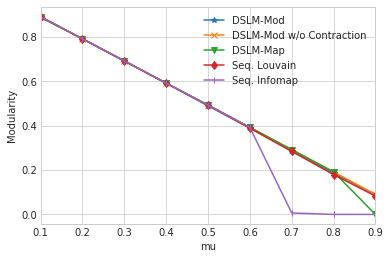

In [8]:
df = frames['clustering'] \
    .merge(frames['algorithm_run'], left_on='algorithm_run_id', right_index=True) \
    .merge(frames['program_run'], left_on='program_run_id', right_index=True) \
    .groupby(['mu', 'algorithm'])['modularity'].mean().to_frame() \
    .unstack()['modularity'][[dlslm_label, dlslm_nc_label, dlslm_me_label, seq_louvain_label, seq_infomap_label]]
    
plot_and_save(df, "quality_modularity", ylabel="Modularity", style=['-*', '-x', '-v', '-d', '-|'])

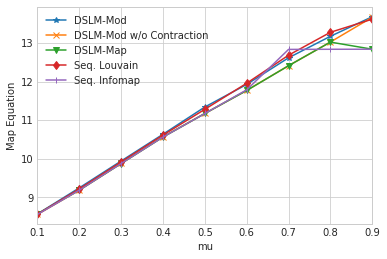

In [9]:
df = frames['clustering'] \
    .merge(frames['algorithm_run'], left_on='algorithm_run_id', right_index=True) \
    .merge(frames['program_run'], left_on='program_run_id', right_index=True) \
    .groupby(['mu', 'algorithm'])['map_equation'].mean().to_frame() \
    .unstack()['map_equation'][[dlslm_label, dlslm_nc_label, dlslm_me_label, seq_louvain_label, seq_infomap_label]]
    
plot_and_save(df, "quality_map_equation", ylabel="Map Equation", style=['-*', '-x', '-v', '-d', '-|'])